In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

from functions.read_g4bl_data import readTraceData

# Location of G4bl output:
file = '../automate-g4bl-frozen/ref-p-scan/simulations/sim19/ReferenceParticle.txt' # 221.8 MeV/c

# Define RF period:
f = 325*10**6 # MHz
T = 1/f*10**9 # ns

# Length of period:
len_period = 4200 # mm

# Figure directory:
fig_dir = 'figures/'

In [4]:
# Read in data:
data = readTraceData(file)
x_vals = data['x'].values; y_vals = data['y'].values; z_vals = data['z'].values # mm
px_vals = data['px'].values; py_vals = data['py'].values; pz_vals = data['pz'].values; ptotal_vals = data['ptotal'].values # MeV/c
t_vals = data['t'].values # ns
Bx_vals = data['Bx'].values; By_vals = data['By'].values; Bz_vals = data['Bz'].values # T

# Find indices for first value in each period:
next_z = 0; period_start_z_vals = []; period_start_indices = []
for i in range(len(z_vals)):
    if z_vals[i] > next_z:
        period_start_z_vals.append(z_vals[i])
        period_start_indices.append(i)
        next_z += len_period

In [5]:
# Verify reference particle momentum:
print(ptotal_vals[0])

221.8


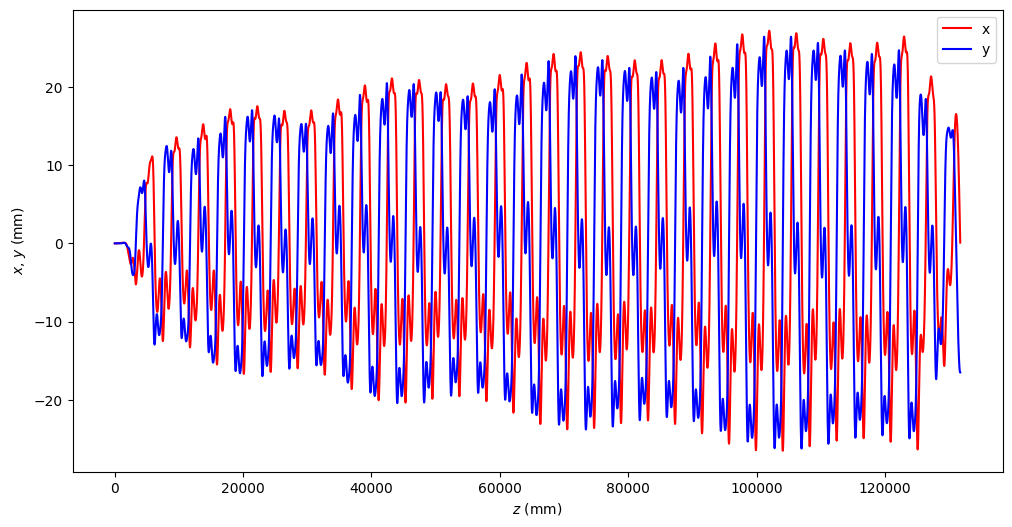

In [6]:
# Plot x, y along z:
plt.figure(figsize = (12,6))
plt.plot(z_vals,x_vals,color='red',label='x')
plt.plot(z_vals,y_vals,color='blue',label='y')
plt.xlabel('$z$ (mm)')
plt.ylabel('$x$, $y$ (mm)')
plt.legend()
plt.show()

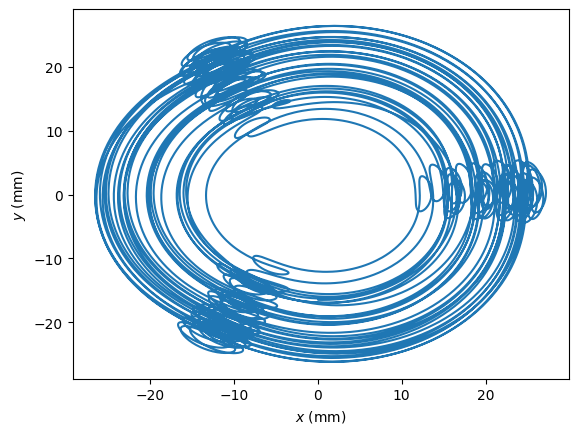

In [7]:
# Plot projection in x-y plane (for periodic section only):
plt.figure()
plt.plot(x_vals[period_start_indices[2]:],y_vals[period_start_indices[2]:])
plt.xlabel('$x$ (mm)')
plt.ylabel('$y$ (mm)')
plt.show()

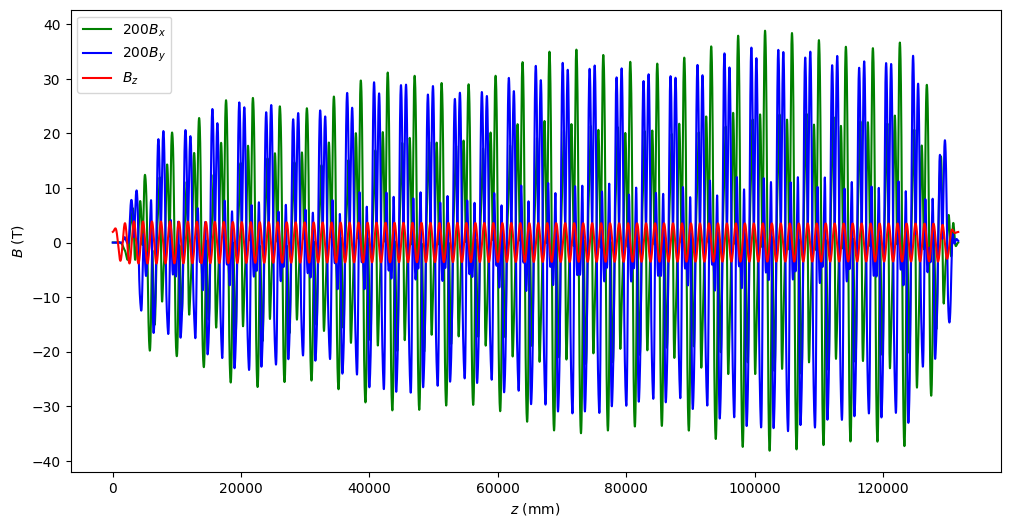

In [8]:
# Plot magnetic field for entire channel:
plt.figure(figsize = (12,6))
plt.plot(z_vals,[i*200 for i in Bx_vals],color='green',label='$200B_x$')
plt.plot(z_vals,[i*200 for i in By_vals],color='blue',label='$200B_y$')
plt.plot(z_vals,Bz_vals,color='red',label='$B_z$')
plt.xlabel('$z$ (mm)')
plt.ylabel('$B$ (T)')
plt.legend()
plt.show()

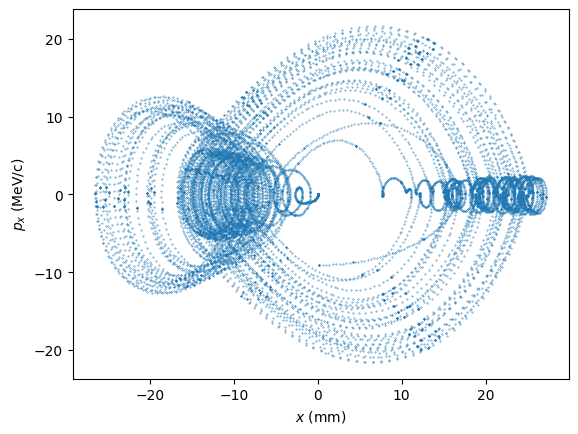

In [9]:
# Plot phase space trajectory (x):
plt.figure()
plt.scatter(x_vals,px_vals,s=0.1)
plt.xlabel('$x$ (mm)')
plt.ylabel('$p_x$ (MeV/c)')
plt.show()

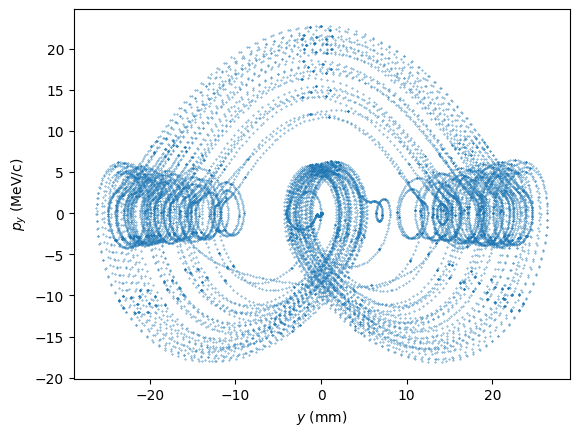

In [10]:
# Plot phase space trajectory (y):
plt.figure()
plt.scatter(y_vals,py_vals,s=0.1)
plt.xlabel('$y$ (mm)')
plt.ylabel('$p_y$ (MeV/c)')
plt.show()

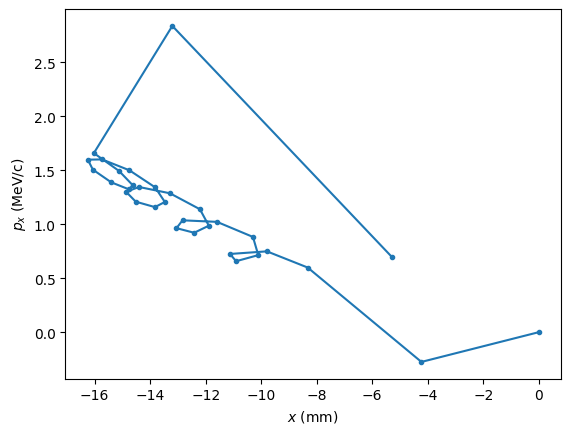

In [11]:
# Plot in phase space once per period:
plt.figure()
x_periodic = []
px_periodic = []
z_periodic = []
for i in range(len(period_start_indices)):
    index = period_start_indices[i]
    x_periodic.append(x_vals[index])
    px_periodic.append(px_vals[index])
    z_periodic.append(z_vals[index])
plt.plot(x_periodic, px_periodic,marker='.')
plt.xlabel('$x$ (mm)')
plt.ylabel('$p_x$ (MeV/c)')
plt.show()

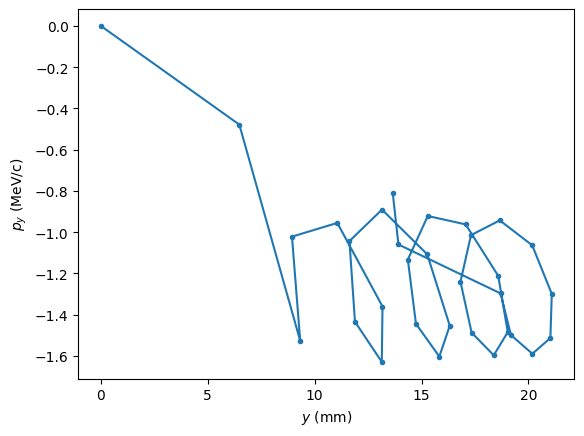

In [12]:
# Plot in phase space once per period:
plt.figure()
y_periodic = []
py_periodic = []
for i in range(len(period_start_indices)):
    index = period_start_indices[i]
    y_periodic.append(y_vals[index])
    py_periodic.append(py_vals[index])
plt.plot(y_periodic, py_periodic,marker='.')
plt.xlabel('$y$ (mm)')
plt.ylabel('$p_y$ (MeV/c)')
plt.show()

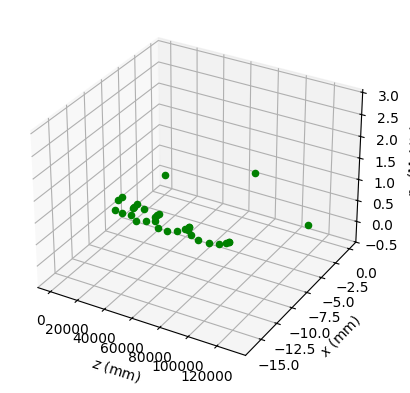

In [13]:
# 3D plot of Poincaré section (x):
# %matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
for i in range(len(x_periodic)):
    ax.scatter(z_periodic[i],x_periodic[i],px_periodic[i],color='green') # position m -> cm
ax.set_xlabel('$z$ (mm)')
ax.set_ylabel('$x$ (mm)')
ax.set_zlabel('$p_x$ (MeV/c)')
plt.show()

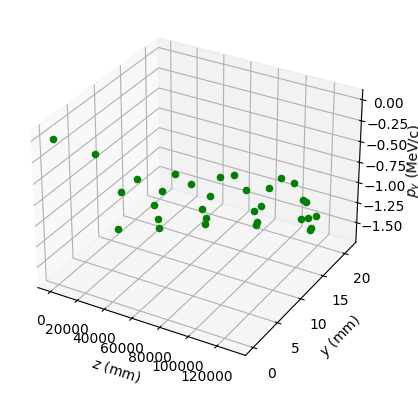

In [14]:
# 3D plot of Poincaré section (y):
# %matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
for i in range(len(y_periodic)):
    ax.scatter(z_periodic[i],y_periodic[i],py_periodic[i],color='green') # position m -> cm
ax.set_xlabel('$z$ (mm)')
ax.set_ylabel('$y$ (mm)')
ax.set_zlabel('$p_y$ (MeV/c)')
plt.show()

### Comparison to Yuri's paper

In [15]:
# Load data from paper -- for single period:
paper_data_dir = '../paper-data/'
xdata = np.genfromtxt(paper_data_dir+'paper_x_vs_z.csv',delimiter=',')
xdata_x = []; xdata_z = []
for i in range(len(xdata)):
    xdata_z.append(xdata[i][0])
    xdata_x.append(xdata[i][1])
ydata = np.genfromtxt(paper_data_dir+'paper_y_vs_z.csv',delimiter=',')
ydata_y = []; ydata_z = []
for i in range(len(ydata)):
    ydata_z.append(ydata[i][0])
    ydata_y.append(ydata[i][1])

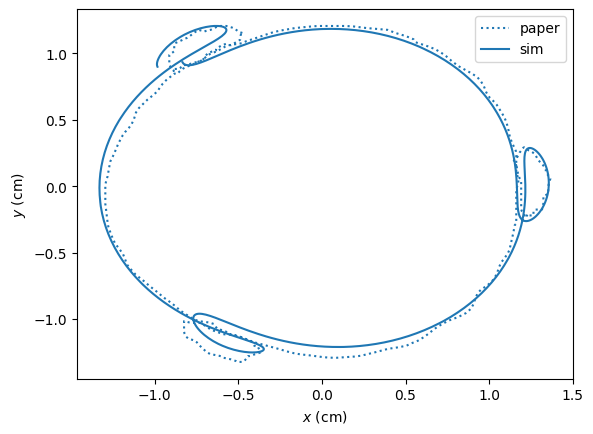

In [16]:
# Subplot x-y trajeectory from paper + single period from sim:
plt.figure()
end_first_period = period_start_indices[1]; end_second_period = period_start_indices[2]
num = end_second_period - end_first_period
z_range = np.linspace(0,420,round(num,1))
x_interp = np.interp(z_range,xdata_z,xdata_x)
y_interp = np.interp(z_range,ydata_z,ydata_y)
plt.plot(x_interp,y_interp,color='tab:blue',label='paper', linestyle=':')

end_third_period = period_start_indices[3]
x_vals_one_period = x_vals[end_second_period:end_third_period]
x_vals_one_period = [i/10 for i in x_vals_one_period] # mm --> cm
y_vals_one_period = y_vals[end_second_period:end_third_period]
y_vals_one_period = [i/10 for i in y_vals_one_period] # mm --> cm
plt.plot(x_vals_one_period,y_vals_one_period,color='tab:blue',label='sim')

plt.xlabel('$x$ (cm)')
plt.ylabel('$y$ (cm)')
plt.legend()
plt.show()

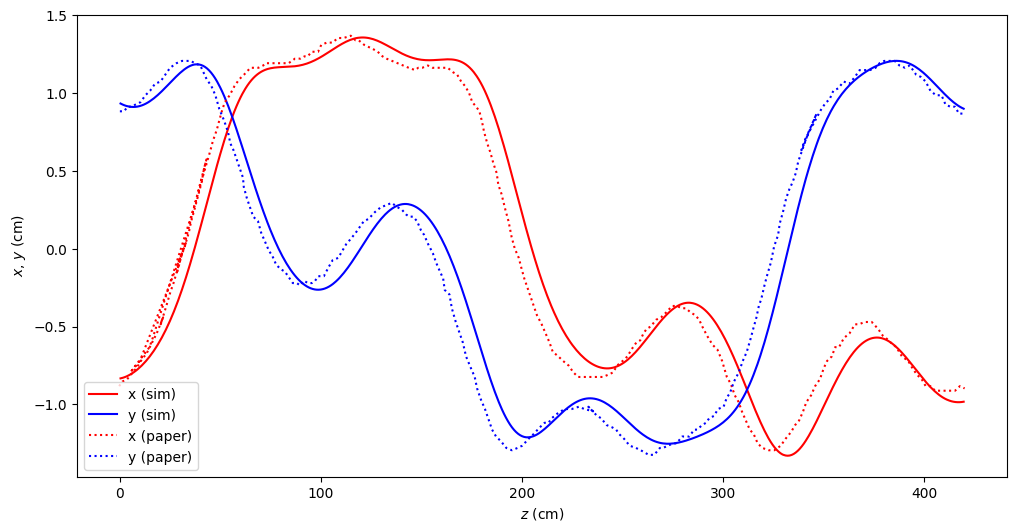

In [17]:
# Subplot trajectory for sim third period + paper:
plt.figure(figsize = (12,6))
positions = z_vals[end_second_period:end_third_period]
for i in range(len(positions)):
    positions[i] = positions[i] - 2*len_period
    positions[i] = positions[i]/10 # mm --> m
plt.plot(positions,x_vals_one_period,color='red',label='x (sim)') # mm --> m
plt.plot(positions,y_vals_one_period,color='blue',label='y (sim)') # mm --> m
plt.plot(xdata_z,xdata_x,color='red',label='x (paper)',linestyle=':')
plt.plot(ydata_z,ydata_y,color='blue',label='y (paper)',linestyle=':')
plt.xlabel('$z$ (cm)')
plt.ylabel('$x$, $y$ (cm)')
plt.legend(loc='lower left')
plt.show()

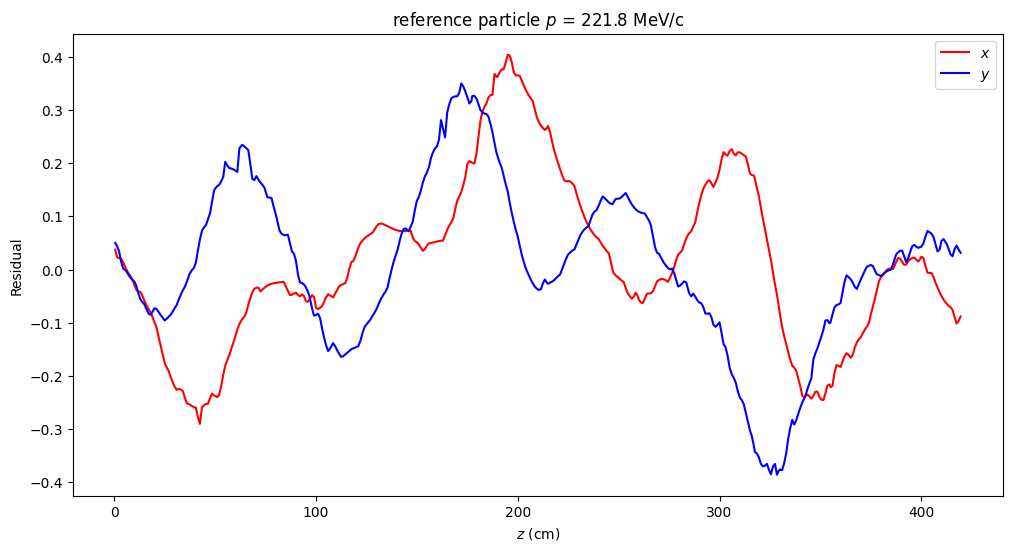

In [18]:
# Plot difference between simulation and paper trajectories:
x_paper_interp = np.interp(positions,xdata_z,xdata_x)
y_paper_interp = np.interp(positions,ydata_z,ydata_y)

x_diff = []
y_diff = []
x_total_residual = 0
y_total_residual = 0
for i in range(len(positions)):
    x_diff.append(x_vals_one_period[i] - x_paper_interp[i])
    y_diff.append(y_vals_one_period[i] - y_paper_interp[i])
    x_total_residual += x_diff[i]
    y_total_residual += y_diff[i]

plt.figure(figsize = (12,6))
plt.plot(positions,x_diff,color='red',label=f'$x$')
plt.plot(positions,y_diff,color='blue',label=f'$y$')
plt.ylabel('Residual')
plt.xlabel('$z$ (cm)')
plt.title(f'reference particle $p$ = {ptotal_vals[0]} MeV/c')
plt.legend()
plt.show()

In [19]:
print(f'Overall x residual: {x_total_residual}')
print(f'Overall y residual: {y_total_residual}')

Overall x residual: 6.55207566474026
Overall y residual: 3.3876397415784854


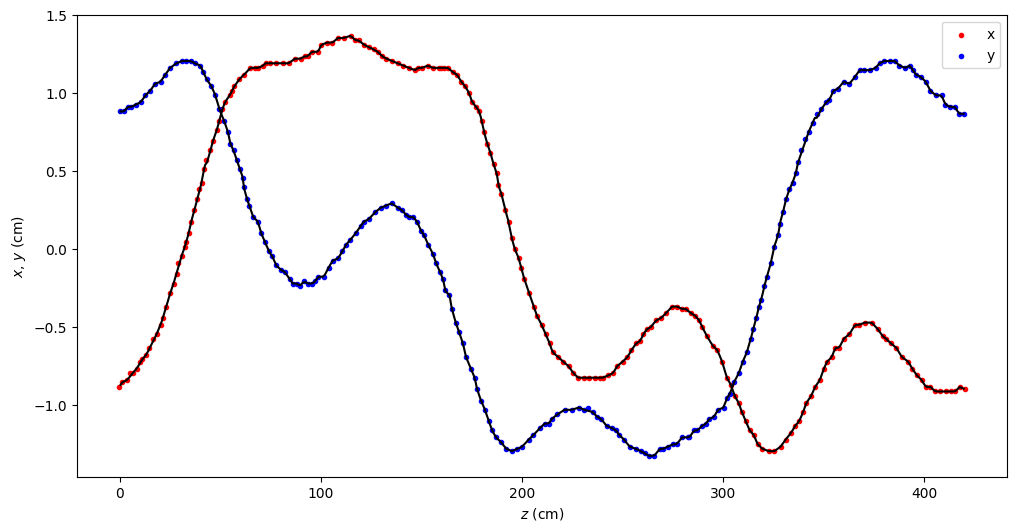

In [20]:
# Check interpolation for digitized paper data:
plt.figure(figsize = (12,6))
plt.plot(positions,x_paper_interp,color='black')
plt.scatter(xdata_z,xdata_x,marker='.',color='red',label='x')
plt.plot(positions,y_paper_interp,color='black')
plt.scatter(ydata_z,ydata_y,marker='.',color='blue',label='y')
plt.ylabel('$x$, $y$ (cm)')
plt.xlabel('$z$ (cm)')
plt.legend()
plt.show()